In [1]:
import numpy as np
import pandas as pd
import networkx as nx
#import json
#import os
import page_ranker as pr
#import import_graph as ig
import inspect_subgraph as isg

import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
n2 = 0
n1 = 7

In [38]:
barbell = nx.barbell_graph(n1, n2)

In [39]:
G = nx.MultiDiGraph()
for e in barbell.edges:
    G.add_edge(e[0],e[1])
    
nx.set_node_attributes(G,'vanilla', 'type')
nx.set_edge_attributes(G,'vanilla', 'type')

In [40]:
G.nodes[0]

{'type': 'vanilla'}

In [41]:
G.edges[(0,1,0)]

{'type': 'vanilla'}

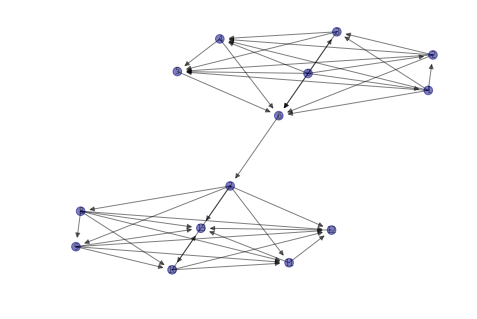

In [42]:
isg.inspectSubGraph(G, G.nodes, expand=False, verbose=False, label=True,pos = "kk")

In [62]:
alpha = .1
iterations = 50

N= len(G.nodes)
#seed = {n:1.0/N for n in G.nodes}
seed = {n:0 for n in G.nodes}
seed[13]=.5
seed[9]=.5

node_wt_by_type = {'vanilla': 1}
edge_wt_by_type = {'vanilla': (1,1/2)}

self_loop_wt= 1

In [63]:
r, df, g = pr.pageRanker(G,
                         alpha,
                         iterations,
                         seed=seed,
                         initial_value = seed,
                         lazy=True,
                         self_loop_wt=self_loop_wt, 
                         node_wt_by_type =node_wt_by_type,
                         edge_wt_by_type=edge_wt_by_type)

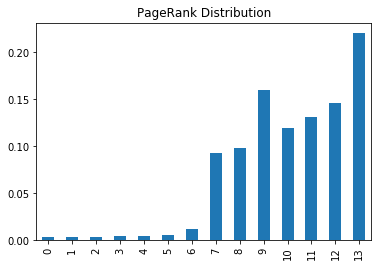

In [64]:
df.tail(1).T.plot(kind='bar',legend=False, title='PageRank Distribution')

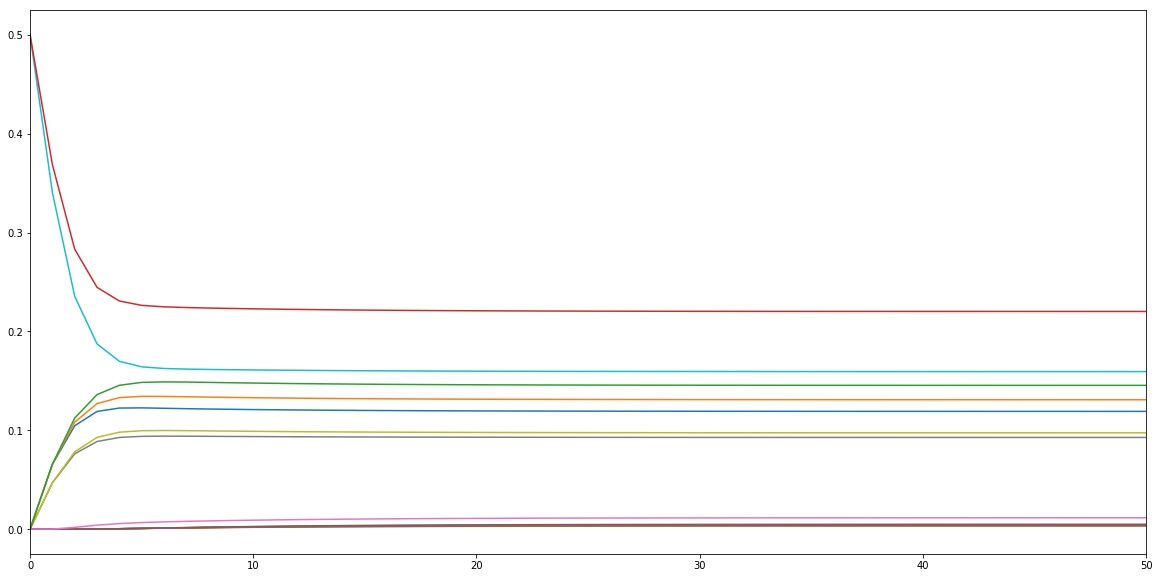

In [65]:
df.plot(legend=False, figsize=(20,10))

In [66]:
df.sum(axis=1)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    1.0
50    1.0
dtype: float64

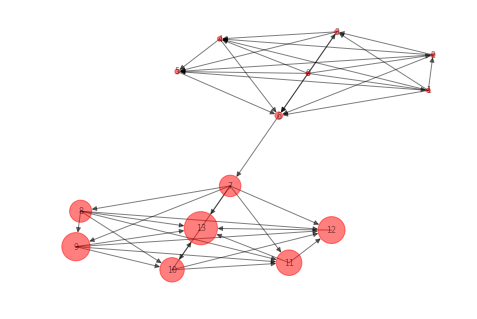

In [67]:
ns = [5000*G.nodes[n]['score'] for n in G.nodes]
nl = {n:n for n in G.nodes}

nx.draw_kamada_kawai(G, node_size=ns, labels=nl, font_size=8, alpha =.5)

In [68]:
nx.get_node_attributes(G,'total_wt')

{0: 7,
 1: 6.5,
 2: 6.0,
 3: 5.5,
 4: 5.0,
 5: 4.5,
 6: 5.0,
 7: 7.5,
 8: 6.5,
 9: 6.0,
 10: 5.5,
 11: 5.0,
 12: 4.5,
 13: 4.0}

In [69]:
nx.get_node_attributes(G,'total_wt')

{0: 7,
 1: 6.5,
 2: 6.0,
 3: 5.5,
 4: 5.0,
 5: 4.5,
 6: 5.0,
 7: 7.5,
 8: 6.5,
 9: 6.0,
 10: 5.5,
 11: 5.0,
 12: 4.5,
 13: 4.0}

In [ ]:
nx.get_edge_attributes(G,'out_weight')

In [ ]:
nx.get_edge_attributes(G,'out_weight')